# project :- KITAAB (Genre of books)

## PROBLEM STATEMENT

## import libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

In [2]:
import re
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import unidecode
import contractions
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from langdetect import detect
from googletrans import Translator

## creating dataset

In [3]:
df = pd.read_csv("D:\\project 2 genre of books\\project.csv")  # creating data set from the csv file.
df

,Unnamed: 0,title,rating,name,num_ratings,num_reviews,num_followers,synopsis,genre
0,0,Sapiens: A Brief History of Humankind,4.39,Yuval Noah Harari,"8,06,229","46,149",30.5k,"100,000 years ago, at least six human species ...",history
1,1,"Guns, Germs, and Steel: The Fates of Human Soc...",4.04,Jared Diamond,"3,67,056","12,879","6,538","""Diamond has written a book of remarkable scop...",history
2,2,A People's History of the United States,4.07,Howard Zinn,"2,24,620","6,509","2,354","In the book, Zinn presented a different side o...",history
3,3,"The Devil in the White City: Murder, Magic, an...",3.99,Erik Larson,"6,13,157","36,644",64.2k,Author Erik Larson imbues the incredible event...,history
4,4,The Diary of a Young Girl,4.18,Anne Frank,"33,13,033","35,591","4,621",Discovered in the attic in which she spent the...,history
...,...,...,...,...,...,...,...,...,...
1534,1534,Hounded,4.09,Kevin Hearne,"83,827","7,203","11,905","Atticus O’Sullivan, last of the Druids, lives ...",fantasy
1535,1535,Charlie and the Chocolate Factory,4.15,Roald Dahl,"7,75,001","14,252","22,897",Charlie Bucket's wonderful adventure begins wh...,fantasy
1536,1536,Red Rising,4.25,Pierce Brown,"3,10,138","30,388","30,510","""I live for the dream that my children will be...",fantasy
1537,1537,Frostbite,4.26,Richelle Mead,"3,37,538","12,435","66,448","Rose loves Dimitri, Dimitri might love Tasha, ...",fantasy


In [4]:
df.info()   ## it will give all theoretical data regarding our dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1539 entries, 0 to 1538
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1539 non-null   int64  
 1   title          1539 non-null   object 
 2   rating         1539 non-null   float64
 3   name           1539 non-null   object 
 4   num_ratings    1539 non-null   object 
 5   num_reviews    1539 non-null   object 
 6   num_followers  1539 non-null   object 
 7   synopsis       1539 non-null   object 
 8   genre          1539 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 108.3+ KB


In [5]:
df.isna().sum()  ## gives idea about null values. here no null values are present.

Unnamed: 0       0
title            0
rating           0
name             0
num_ratings      0
num_reviews      0
num_followers    0
synopsis         0
genre            0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.shape ## tells us no of rows and columns.

(1539, 9)

## preprocessing

In [8]:
df = df[["title","synopsis","genre"]]  ## considering columns which are required for our model.
df

,title,synopsis,genre
0,Sapiens: A Brief History of Humankind,"100,000 years ago, at least six human species ...",history
1,"Guns, Germs, and Steel: The Fates of Human Soc...","""Diamond has written a book of remarkable scop...",history
2,A People's History of the United States,"In the book, Zinn presented a different side o...",history
3,"The Devil in the White City: Murder, Magic, an...",Author Erik Larson imbues the incredible event...,history
4,The Diary of a Young Girl,Discovered in the attic in which she spent the...,history
...,...,...,...
1534,Hounded,"Atticus O’Sullivan, last of the Druids, lives ...",fantasy
1535,Charlie and the Chocolate Factory,Charlie Bucket's wonderful adventure begins wh...,fantasy
1536,Red Rising,"""I live for the dream that my children will be...",fantasy
1537,Frostbite,"Rose loves Dimitri, Dimitri might love Tasha, ...",fantasy


In [9]:
def lang_detect(data):  ## detecting the type of language present in the synopsis as book can be from any region.
    lang1 = detect(data)  ## support by default 55 languages.
    return lang1

In [10]:
df["language_detected"] = df["synopsis"].apply(lang_detect)  ## .apply is used to apply user defined function to dataframe 
df

,title,synopsis,genre,language_detected
0,Sapiens: A Brief History of Humankind,"100,000 years ago, at least six human species ...",history,en
1,"Guns, Germs, and Steel: The Fates of Human Soc...","""Diamond has written a book of remarkable scop...",history,en
2,A People's History of the United States,"In the book, Zinn presented a different side o...",history,en
3,"The Devil in the White City: Murder, Magic, an...",Author Erik Larson imbues the incredible event...,history,en
4,The Diary of a Young Girl,Discovered in the attic in which she spent the...,history,en
...,...,...,...,...
1534,Hounded,"Atticus O’Sullivan, last of the Druids, lives ...",fantasy,en
1535,Charlie and the Chocolate Factory,Charlie Bucket's wonderful adventure begins wh...,fantasy,en
1536,Red Rising,"""I live for the dream that my children will be...",fantasy,en
1537,Frostbite,"Rose loves Dimitri, Dimitri might love Tasha, ...",fantasy,en


In [11]:
df["language_detected"].value_counts()  ## there are differen languages present need to change in to enlish

en    1523
es       4
fr       3
de       3
nl       1
vi       1
pt       1
pl       1
hu       1
lt       1
Name: language_detected, dtype: int64

In [15]:
def lang_translate(data):             ## used to translate different languages to enlish by default. 
    translator = Translator()
    trans_data = translator.translate(data)
    return trans_data.text

In [16]:
df["translated_synopsis"] = df["synopsis"].apply(lang_translate)
df

,title,synopsis,genre,language_detected,translated_synopsis
0,Sapiens: A Brief History of Humankind,"100,000 years ago, at least six human species ...",history,en,"100,000 years ago, at least six human species ..."
1,"Guns, Germs, and Steel: The Fates of Human Soc...","""Diamond has written a book of remarkable scop...",history,en,"""Diamond has written a book of remarkable scop..."
2,A People's History of the United States,"In the book, Zinn presented a different side o...",history,en,"In the book, Zinn presented a different side o..."
3,"The Devil in the White City: Murder, Magic, an...",Author Erik Larson imbues the incredible event...,history,en,Author Erik Larson imbues the incredible event...
4,The Diary of a Young Girl,Discovered in the attic in which she spent the...,history,en,Discovered in the attic in which she spent the...
...,...,...,...,...,...
1534,Hounded,"Atticus O’Sullivan, last of the Druids, lives ...",fantasy,en,"Atticus O’Sullivan, last of the Druids, lives ..."
1535,Charlie and the Chocolate Factory,Charlie Bucket's wonderful adventure begins wh...,fantasy,en,Charlie Bucket's wonderful adventure begins wh...
1536,Red Rising,"""I live for the dream that my children will be...",fantasy,en,"""I live for the dream that my children will be..."
1537,Frostbite,"Rose loves Dimitri, Dimitri might love Tasha, ...",fantasy,en,"Rose loves Dimitri, Dimitri might love Tasha, ..."


In [17]:
df.nunique()   ## gives no of unique categories in each column

title                  1539
synopsis               1539
genre                    10
language_detected        10
translated_synopsis    1539
dtype: int64

In [18]:
df.isna().sum() ## gives no of null values , no null values is present in the data set

title                  0
synopsis               0
genre                  0
language_detected      0
translated_synopsis    0
dtype: int64

In [19]:
df2 = df.drop(["synopsis","language_detected"],axis = 1) ## dropping unwanted columns.

In [20]:
df2

,title,genre,translated_synopsis
0,Sapiens: A Brief History of Humankind,history,"100,000 years ago, at least six human species ..."
1,"Guns, Germs, and Steel: The Fates of Human Soc...",history,"""Diamond has written a book of remarkable scop..."
2,A People's History of the United States,history,"In the book, Zinn presented a different side o..."
3,"The Devil in the White City: Murder, Magic, an...",history,Author Erik Larson imbues the incredible event...
4,The Diary of a Young Girl,history,Discovered in the attic in which she spent the...
...,...,...,...
1534,Hounded,fantasy,"Atticus O’Sullivan, last of the Druids, lives ..."
1535,Charlie and the Chocolate Factory,fantasy,Charlie Bucket's wonderful adventure begins wh...
1536,Red Rising,fantasy,"""I live for the dream that my children will be..."
1537,Frostbite,fantasy,"Rose loves Dimitri, Dimitri might love Tasha, ..."


In [21]:
df2['genre'] = LabelEncoder().fit_transform(df2['genre'])  ## label encoding of target column. 
df2['genre'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8, 9, 0])

In [22]:
x = df2["translated_synopsis"]  ## creating dependent and independent data sets.
y = df2["genre"]

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state = 10)
 ## splitting training and testing datasets

In [24]:
def new_line(data):   ## for removing new lines
    clean_text = data.replace("\n","").replace("\\n","").replace("\t","").replace("\\","")
    return clean_text

In [25]:
train_clean_text = xtrain.apply(new_line)
test_clean_text = xtest.apply(new_line)

In [26]:
def white_space(data):   ## for removing multiple whitespaces
    clean_text = re.sub(r"\s+","",data)
    return clean_text

In [27]:
train_clean_text = xtrain.apply(white_space)
test_clean_text = xtest.apply(white_space)

In [28]:
def accented_ch(data):   ## for removing accented characters
    clean_text = unidecode.unidecode(data)
    return clean_text

In [29]:
train_clean_text = xtrain.apply(accented_ch)
test_clean_text = xtest.apply(accented_ch)

In [30]:
def contraction(data):          ## used for contraction mapping
    tokens = data.split() 
    expanded_words = []
    for words in tokens:
        expanded_words.append(contractions.fix(words))
    expanded_text = " ".join(expanded_words)
    return expanded_text

In [31]:
train_clean_text = xtrain.apply(contraction)
test_clean_text = xtest.apply(contraction)

In [32]:
stop = stopwords.words("english")
print(stop)
print()
print(punctuation)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [33]:
def stop_words(data):                                   ## for removing stop word and punctuations.
    tokens = RegexpTokenizer(r"[\w']+").tokenize(data)
    clean_text = [a for a in tokens if a not in stop]
    final_text = []
    for word in clean_text:
        if (len(word)>=2) or word in punctuation:
            pass
    else:
        final_text.append(word)
    text = " ".join(final_text)
    return text

In [34]:
train_clean_text = xtrain.apply(stop_words)
test_clean_text = xtest.apply(stop_words)

In [35]:
def lemmatization(data):                              ## tokenizing the data.
    tokens = word_tokenize(data)
    tokens = [word.lower() for word in tokens if word.isalpha()]
    lemma = WordNetLemmatizer()
    final_text =[]
    for i in tokens:
        lemmatized_word = lemma.lemmatize(i)
        final_text.append(lemmatized_word)
    return " ".join(final_text)

In [36]:
train_clean_text = xtrain.apply(lemmatization)
test_clean_text = xtest.apply(lemmatization)

In [37]:
# def spelling_correction(data):   ## too much time consuming thats why skipped for now . used for spelling correction
#     spell = Speller(lang='en')
#     corrrected_text = spell(data)
#     return corrrected_text

In [38]:
# train_clean_text = xtrain.apply(spelling_correction)
# test_clean_text = xtest.apply(spelling_correction)

## EDA

<AxesSubplot:xlabel='genre', ylabel='count'>

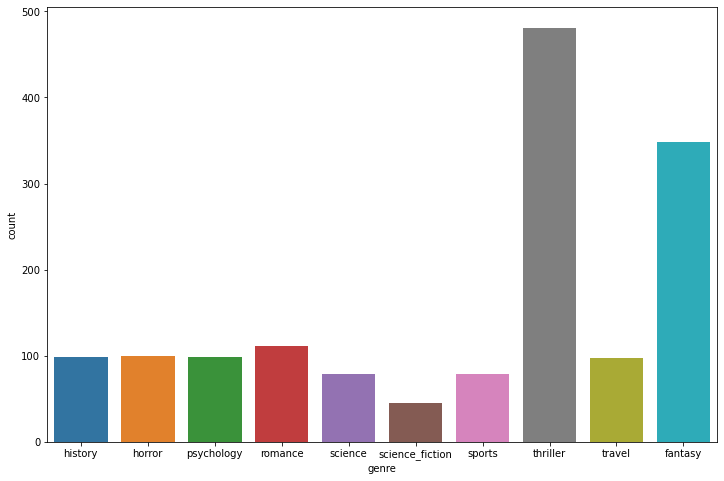

In [39]:
plt.figure(figsize = (12,8))            ## shows count of each category in the data.
sns.countplot(df["genre"],)

In [40]:
## thriller and fantasy are in highest no.

In [41]:
## plotting top ngrams

In [42]:
def get_ngrams(df,column,ngram_range,n=None):
  """This function will give us ngrams and plot graph for ngrams"""
  cv = CountVectorizer(ngram_range=ngram_range,stop_words='english')  ## creating instance
  bow = cv.fit_transform(df[column])   ## fitting that column to the instance ,gives sparse matrix
  sum_of_words = bow.sum(axis=0)    ## gives count of every word
  
  word_freq = [(word,sum_of_words[0,i]) for word,i in cv.vocabulary_.items()] # gives word and count[(word, count)]
  
  word_freq = sorted(word_freq,key= lambda x : x[1],reverse=True) ## sort that list

  df_ngrams = pd.DataFrame(word_freq[:n],columns = ['word','count']) # create top ngrams
 
  fig,ax = plt.subplots(figsize=(12,8))
  plt.xticks(rotation='vertical')
  fig = sns.barplot(x='word',y='count',data =df_ngrams )
  plt.show()

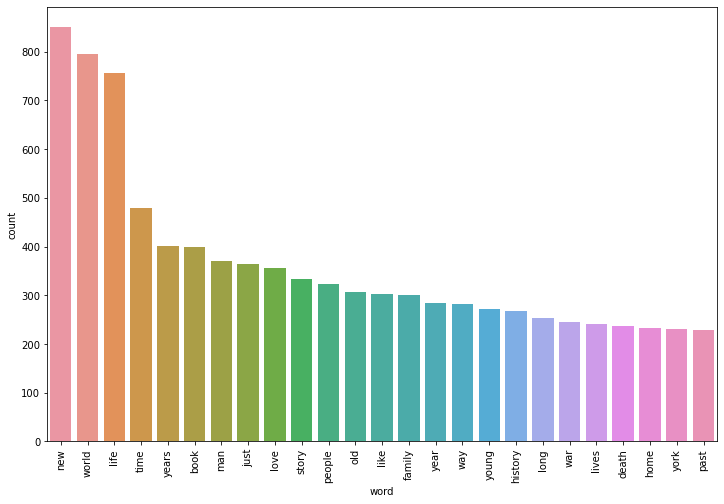

In [43]:
get_ngrams(df2,"translated_synopsis",(1,1),25)   ## shows top 25 ngrams which are most frequent

In [44]:
## creating wordcloud, need to give all at once.

In [45]:
def wordcloud(data,column):  ## need to gve all data at once in large string
  df = data[column].str.cat(sep=' ') ## create large string with \n in it
  text = " ".join([word for word in df.split() ])  # removes \n from it

  word_cloud = WordCloud(width=700,height=400,min_font_size=10).generate(text)
  plt.figure(figsize=(10,16))
  plt.imshow(word_cloud)
  plt.show()

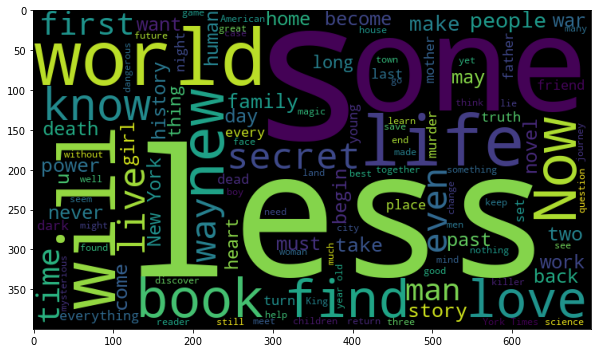

In [46]:
wordcloud(df2,"translated_synopsis") 

## modelling

## 1) countvectorizer

In [47]:
count = CountVectorizer(max_df = 0.95, max_features = 1000, lowercase = True)  ## create model instance
count_train = count.fit_transform(train_clean_text)  ## fit and transforming the training data
count_test = count.transform(test_clean_text)   ## only transforming the testing data to avoid data leakage.

In [48]:
count_train.A  ## without .A gives sparse matrix , aftr applying give array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0]], dtype=int64)

In [49]:
pd.DataFrame(count_train.A, columns = count.get_feature_names())  ## creating data set 

,abandoned,ability,able,about,above,accident,acclaimed,account,across,act,...,writer,writing,written,wrong,year,yet,york,you,young,your
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,2,0,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1072,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1073,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,1
1074,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1075,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
## pd.DataFrame(count_test.A, columns = count.get_feature_names()) ## we can make similar for test data set also.

## Evaluation

In [51]:
mul_count = MultinomialNB()  ## evaluating using multinomial naive bayes algorithm.
mul_count.fit(count_train.A, ytrain) ## fitting training data into model.

MultinomialNB()

In [52]:
ypred_mul_count = mul_count.predict(count_test.A) ## predicting the data.

In [64]:
accuracy_count = accuracy_score(ytest, ypred_mul_count)  ## finding accuracy of the model.
print("accuracy score is : ", accuracy_count)

confusion_count = confusion_matrix(ytest, ypred_mul_count)  ## craeting confusion matrix
print("confusion_matrix is : \n", confusion_count)
print()

confusion_report_count = classification_report(ytest, ypred_mul_count) ## finding other metric like precision recall and f1score
print("confusion_report_count score is : \n", confusion_report_count)

accuracy score is :  0.7316017316017316
confusion_matrix is : 
 [[ 82   0   4   1   5   0   0   3   9   1]
 [  1  24   1   2   0   2   0   0   0   1]
 [  3   0  14   0   1   0   1   1  11   0]
 [  0   2   0  17   1   1   0   0   1   0]
 [  4   0   0   0  17   0   1   4   9   0]
 [  0   3   0   1   0  18   0   0   0   0]
 [  1   1   3   0   0   0   7   0   0   0]
 [  0   0   0   1   2   1   0  14   0   1]
 [  7   1  11   0  10   1   2   2 120   0]
 [  1   1   1   0   2   1   0   0   0  25]]

confusion_report_count score is : 
               precision    recall  f1-score   support

           0       0.83      0.78      0.80       105
           1       0.75      0.77      0.76        31
           2       0.41      0.45      0.43        31
           3       0.77      0.77      0.77        22
           4       0.45      0.49      0.47        35
           5       0.75      0.82      0.78        22
           6       0.64      0.58      0.61        12
           7       0.58      0.74  

<AxesSubplot:>

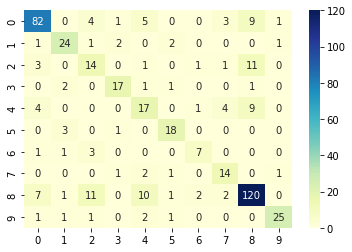

In [65]:
sns.heatmap(pd.DataFrame(confusion_count), annot=True, cmap="YlGnBu" ,fmt='g')

## 2) tfidf

In [66]:
tfidf = TfidfVectorizer(max_df = 0.95, max_features = 1000, lowercase = True) ## creating model instance
tfidf_train = tfidf.fit_transform(train_clean_text) ## fit and transforming training data
tfidf_test = tfidf.transform(test_clean_text)  ## transforming testing data

## evaluation

In [67]:
mul_tfidf = MultinomialNB()  ## creating model instance
mul_tfidf.fit(tfidf_train.A, ytrain) ## fitting training data

MultinomialNB()

In [68]:
ypred_mul_tfidf = mul_tfidf.predict(tfidf_test.A)  ## predicting the data

In [69]:
accuracy_tfidf = accuracy_score(ytest, ypred_mul_tfidf) ## finding accuracy of the model
print("accuracy score is : ", accuracy_tfidf)

confusion_tfidf = confusion_matrix(ytest, ypred_mul_tfidf)  ## creating confusion matrix
print("confusion_matrix is : \n", confusion_tfidf)

confusion_report_tfidf = classification_report(ytest, ypred_mul_tfidf) ## finding other metric like precision recall and f1score
print("confusion_report_count score is : \n", confusion_report_tfidf)

accuracy score is :  0.5562770562770563
confusion_matrix is : 
 [[ 82   0   0   0   0   0   0   0  23   0]
 [ 10   8   0   1   0   0   0   0  12   0]
 [  5   0   0   0   0   0   0   0  26   0]
 [  1   0   0   7   0   0   0   0  14   0]
 [  3   0   0   0   0   0   0   0  32   0]
 [  5   1   0   6   0   7   0   0   3   0]
 [  8   0   0   0   0   0   0   0   4   0]
 [  1   0   0   1   0   0   0   0  17   0]
 [  4   0   0   0   0   0   0   0 150   0]
 [ 10   0   0   0   0   0   0   0  18   3]]
confusion_report_count score is : 
               precision    recall  f1-score   support

           0       0.64      0.78      0.70       105
           1       0.89      0.26      0.40        31
           2       0.00      0.00      0.00        31
           3       0.47      0.32      0.38        22
           4       0.00      0.00      0.00        35
           5       1.00      0.32      0.48        22
           6       0.00      0.00      0.00        12
           7       0.00      0.00   

<AxesSubplot:>

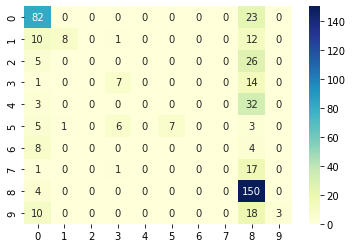

In [70]:
sns.heatmap(pd.DataFrame(confusion_tfidf), annot=True, cmap="YlGnBu" ,fmt='g')

In [59]:
## here we can see that count vectorizor works good as compare to tfidf.
## giving accuracy of 0.73...